## Text Mining
We will follow these steps in our analysis:

### Data Preprocessing:

- Text Cleaning: Remove any irrelevant characters, symbols, or HTML tags.
- Tokenization: Split text into individual words or tokens.
- Lowercasing: Convert all text to lowercase for consistency.
- Stopword Removal: Eliminate common words (e.g., "and," "the") that don't carry significant meaning.
- Stemming or Lemmatization: Reduce words to their root form (e.g., "running" to "run").


### Text Exploration:

- Word Frequency Analysis: Count the frequency of each word in the text.
- Word Clouds: Visualize word frequency with word clouds.

### Text Analysis Techniques:

- Topic Modeling: Identify topics within the text using BERTopic transformer architecture.
- Named Entity Recognition (NER): Extract named entities such as names, locations, and organizations.
- Text Classification: Categorize text into predefined classes or labels.
- Keyword Extraction: Identify important keywords or phrases within the text.

## Data Import

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv',index_col=0, header=0)
df.head()

Channel                                              Title  \
0  Jeff Heaton         LSTM-Based Time Series with PyTorch (10.2)   
1  Jeff Heaton  Time Series Data Encoding for Deep Learning, P...   
2  Jeff Heaton  Bayesian Hyperparameter Optimization for PyTor...   
3  Jeff Heaton  Creating Certificates to Deploy PyInstaller Py...   
4  Jeff Heaton  How Should you Architect Your PyTorch Neural N...   

  PublishedDate  Views  Likes  Comments  
0    2023-10-27    764     45         1  
1    2023-10-26    530     31         1  
2    2023-10-25    453     29         1  
3    2023-10-17    439     12         0  
4    2023-10-12    825     39         1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4081 entries, 0 to 6145
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Channel        4081 non-null   object
 1   Title          4081 non-null   object
 2   PublishedDate  4081 non-null   object
 3   Views          4081 non-null   int64 
 4   Likes          4081 non-null   int64 
 5   Comments       4081 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 223.2+ KB


## Data Preprocessing

In [3]:
df['Title'] = df['Title'].astype(str).str.lower()
df.head(3)

Channel                                              Title  \
0  Jeff Heaton         lstm-based time series with pytorch (10.2)   
1  Jeff Heaton  time series data encoding for deep learning, p...   
2  Jeff Heaton  bayesian hyperparameter optimization for pytor...   

  PublishedDate  Views  Likes  Comments  
0    2023-10-27    764     45         1  
1    2023-10-26    530     31         1  
2    2023-10-25    453     29         1

### Tokenization

In [4]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Title'].apply(regexp.tokenize)
df.head(3)

Channel                                              Title  \
0  Jeff Heaton         lstm-based time series with pytorch (10.2)   
1  Jeff Heaton  time series data encoding for deep learning, p...   
2  Jeff Heaton  bayesian hyperparameter optimization for pytor...   

  PublishedDate  Views  Likes  Comments  \
0    2023-10-27    764     45         1   
1    2023-10-26    530     31         1   
2    2023-10-25    453     29         1   

                                          text_token  
0  [lstm, based, time, series, with, pytorch, 10, 2]  
1  [time, series, data, encoding, for, deep, lear...  
2  [bayesian, hyperparameter, optimization, for, ...

### Remove stop words

In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with custom stopwords
my_stopwords = ['course','build','tutorial','live','week','interview',
                'lesson','using','review','good','specialization',
                'code','first','ineuron','ask','anything','best','public',
                'complete','fresher','virtual','introduction','study'
                ,'event','session','explained','uiuc','lecture',
                'announcement','based','part','reviews']
stopwords.extend(my_stopwords)

# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

Channel                                              Title  \
0  Jeff Heaton         lstm-based time series with pytorch (10.2)   
1  Jeff Heaton  time series data encoding for deep learning, p...   
2  Jeff Heaton  bayesian hyperparameter optimization for pytor...   

  PublishedDate  Views  Likes  Comments  \
0    2023-10-27    764     45         1   
1    2023-10-26    530     31         1   
2    2023-10-25    453     29         1   

                                          text_token  
0               [lstm, time, series, pytorch, 10, 2]  
1  [time, series, data, encoding, deep, learning,...  
2  [bayesian, hyperparameter, optimization, pytor...

In [7]:
df['text_token']

0                    [lstm, time, series, pytorch, 10, 2]
1       [time, series, data, encoding, deep, learning,...
2       [bayesian, hyperparameter, optimization, pytor...
3       [creating, certificates, deploy, pyinstaller, ...
4       [architect, pytorch, neural, network, hyperpar...
                              ...                        
6141    [principle, component, analysis, pca, sklearn,...
6142    [pyspark, beginners, apache, spark, python, li...
6143    [creating, dataset, training, artificial, neur...
6144             [artificial, neural, network, intuition]
6145    [create, artifical, neural, network, keras, 5,...
Name: text_token, Length: 4081, dtype: object

In [8]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2])) # exclude words that are less than 2 letters


In [9]:
df[['Title', 'text_token', 'text_string']].head()

Title  \
0         lstm-based time series with pytorch (10.2)   
1  time series data encoding for deep learning, p...   
2  bayesian hyperparameter optimization for pytor...   
3  creating certificates to deploy pyinstaller py...   
4  how should you architect your pytorch neural n...   

                                          text_token  \
0               [lstm, time, series, pytorch, 10, 2]   
1  [time, series, data, encoding, deep, learning,...   
2  [bayesian, hyperparameter, optimization, pytor...   
3  [creating, certificates, deploy, pyinstaller, ...   
4  [architect, pytorch, neural, network, hyperpar...   

                                         text_string  
0                           lstm time series pytorch  
1    time series data encoding deep learning pytorch  
2       bayesian hyperparameter optimization pytorch  
3  creating certificates deploy pyinstaller pyqt ...  
4   architect pytorch neural network hyperparameters

In [10]:
df['text_string']

0                                lstm time series pytorch
1         time series data encoding deep learning pytorch
2            bayesian hyperparameter optimization pytorch
3       creating certificates deploy pyinstaller pyqt ...
4        architect pytorch neural network hyperparameters
                              ...                        
6141      principle component analysis pca sklearn python
6142    pyspark beginners apache spark python linear r...
6143    creating dataset training artificial neural ne...
6144                  artificial neural network intuition
6145        create artifical neural network keras minutes
Name: text_string, Length: 4081, dtype: object

### Remove infrequent words

In [11]:
all_words = ' '.join([word for word in df['text_string']])
all_words

'lstm time series pytorch time series data encoding deep learning pytorch bayesian hyperparameter optimization pytorch creating certificates deploy pyinstaller pyqt macos app apple app store architect pytorch neural network hyperparameters building ensembles scikit learn pytorch application blink efficiency application emotion detection reality augmentation detecting facial features detecting faces image finetuning dreambooth text images stablediffusion kaggle install pytorch windows gpu gans enhance old photographs deoldify generating faces stylegan3 generative prompt engineering pytorch embeddings layers run alpaca lora google colab accessing chatgpt api detecting multiple items image yolov5 pytorch transformations augment image training data transformers pytorch pretrained neural networks questions dual gpu machine learning exxact dual h100 server pytorch convolutional neural networks machine learning image processing python machine learning pytorch batch normalization use dual nvid

In [12]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

### Frequency distribution

In [13]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'data': 966, 'learning': 956, 'science': 532, 'machine': 511, 'python': 497, 'deep': 371, 'applied': 190, 'neural': 168, 'scientist': 165, 'tensorflow': 135, ...})

In [14]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

In [15]:
df['text_string_fdist']

0                                lstm time series pytorch
1         time series data encoding deep learning pytorch
2                     hyperparameter optimization pytorch
3                     creating deploy app apple app store
4        architect pytorch neural network hyperparameters
                              ...                        
6141                component analysis pca sklearn python
6142    pyspark beginners spark python linear regressi...
6143    creating dataset training artificial neural ne...
6144                  artificial neural network intuition
6145                  create neural network keras minutes
Name: text_string_fdist, Length: 4081, dtype: object

In [16]:
df[['Title', 'text_token', 'text_string', 'text_string_fdist']].head()

Title  \
0         lstm-based time series with pytorch (10.2)   
1  time series data encoding for deep learning, p...   
2  bayesian hyperparameter optimization for pytor...   
3  creating certificates to deploy pyinstaller py...   
4  how should you architect your pytorch neural n...   

                                          text_token  \
0               [lstm, time, series, pytorch, 10, 2]   
1  [time, series, data, encoding, deep, learning,...   
2  [bayesian, hyperparameter, optimization, pytor...   
3  [creating, certificates, deploy, pyinstaller, ...   
4  [architect, pytorch, neural, network, hyperpar...   

                                         text_string  \
0                           lstm time series pytorch   
1    time series data encoding deep learning pytorch   
2       bayesian hyperparameter optimization pytorch   
3  creating certificates deploy pyinstaller pyqt ...   
4   architect pytorch neural network hyperparameters   

                                  text_string_fdist  
0                          lstm time series pytorch  
1   time series data encoding deep learning pytorch  
2               hyperparameter optimization pytorch  
3               creating deploy app apple app store  
4  architect pytorch neural network hyperparameters

## Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [18]:
df['text_string_lem']

0                                lstm time series pytorch
1         time series data encoding deep learning pytorch
2                     hyperparameter optimization pytorch
3                     creating deploy app apple app store
4        architect pytorch neural network hyperparameters
                              ...                        
6141                component analysis pca sklearn python
6142    pyspark beginners spark python linear regressi...
6143    creating dataset training artificial neural ne...
6144                  artificial neural network intuition
6145                  create neural network keras minutes
Name: text_string_lem, Length: 4081, dtype: object

In [19]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])
df.is_equal.value_counts()

is_equal
True     4065
False      16
Name: count, dtype: int64

### Word Cloud Generation

In [20]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

In [21]:
all_words_lem

'lstm time series pytorch time series data encoding deep learning pytorch hyperparameter optimization pytorch creating deploy app apple app store architect pytorch neural network hyperparameters building ensembles scikit learn pytorch application application detection reality augmentation detecting facial features detecting faces image  text images kaggle install pytorch windows gpu gans old deoldify generating faces generative prompt engineering pytorch embeddings layers run google colab chatgpt api detecting multiple image pytorch image training data transformer pytorch pretrained neural networks questions dual gpu machine learning exxact dual server pytorch convolutional neural networks machine learning image processing python machine learning pytorch batch normalization use dual nvidia keras pytorch regularization pytorch applications deep neural networks overview fall 2023 pytorch learning pytorch fold cross validation pytorch network class sequence pytorch early stopping model ra

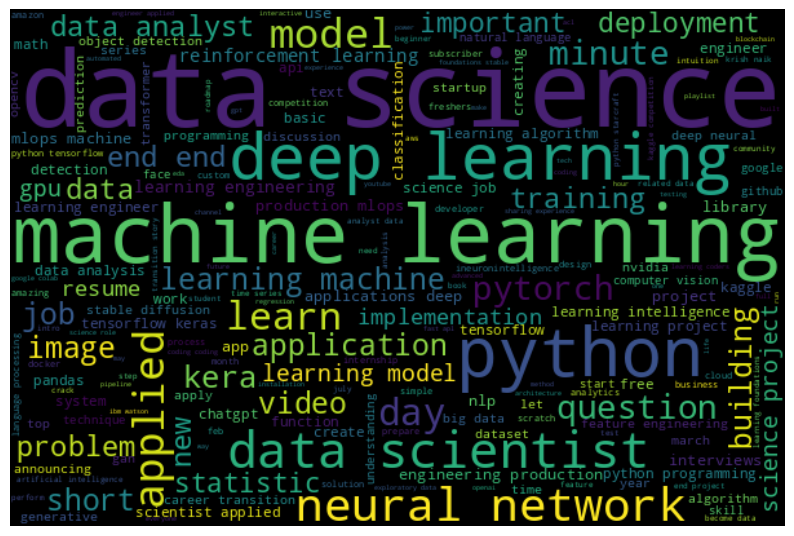

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## Word Cloud per year

In [23]:
df['PublishedDate'] = pd.to_datetime(df['PublishedDate'])

In [24]:
df['Year_published'] = df['PublishedDate'].dt.year
df['Year_published']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
6141    2018
6142    2018
6143    2018
6144    2018
6145    2018
Name: Year_published, Length: 4081, dtype: int32

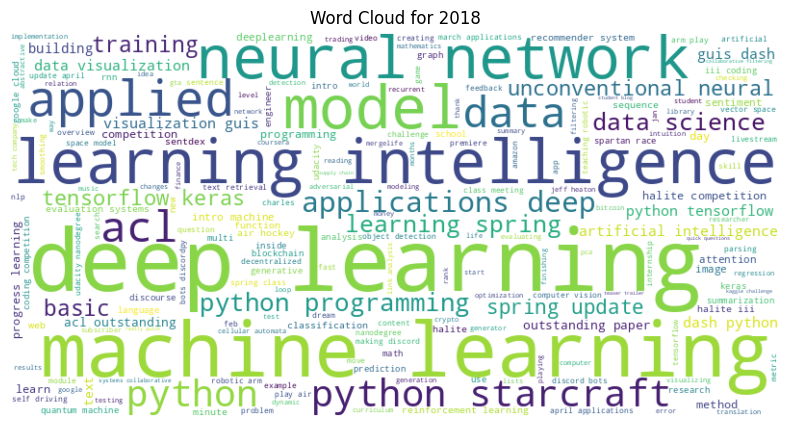

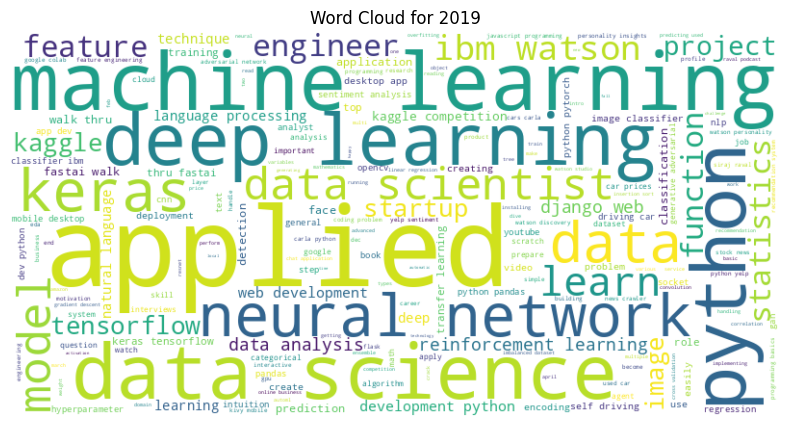

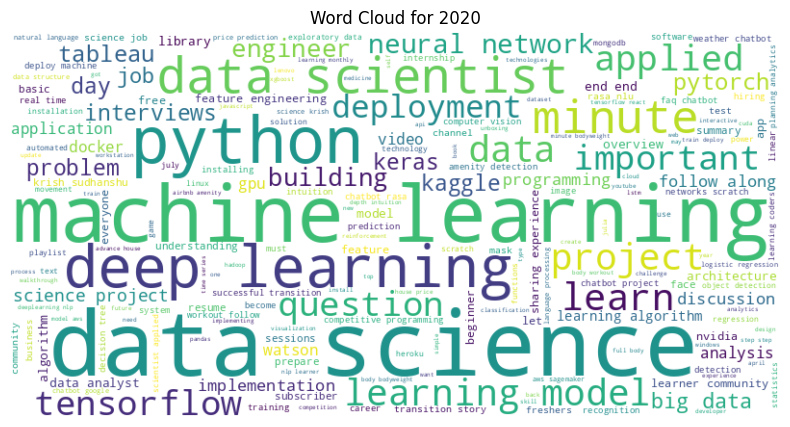

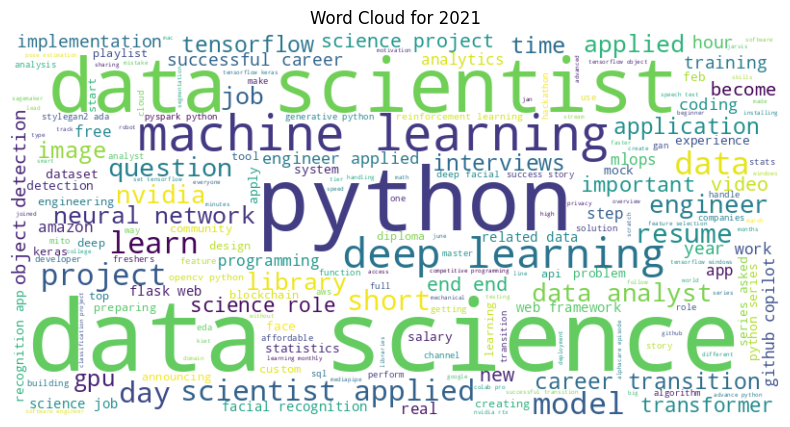

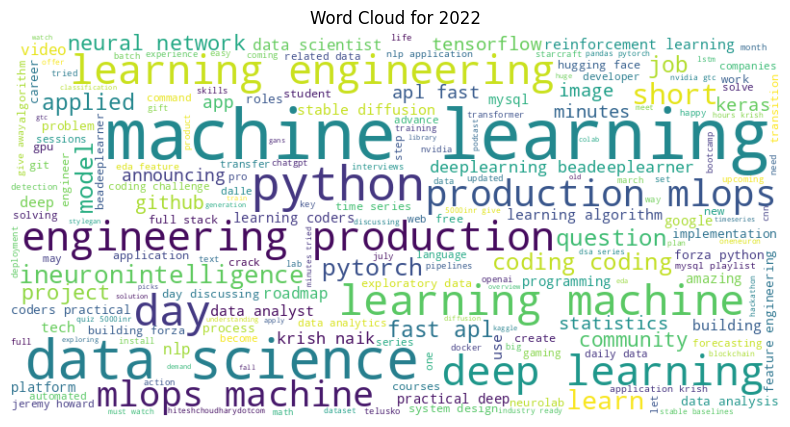

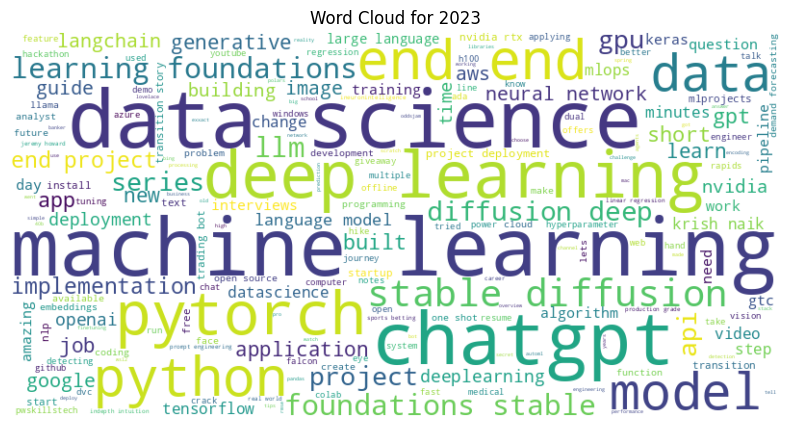

In [25]:

# Group data by 'Year' and concatenate text
grouped = df.groupby('Year_published')['text_string'].apply(' '.join).reset_index()

# Generate word clouds for each year
for index, row in grouped.iterrows():
    year = row['Year_published']
    text = row['text_string']
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {year}')
    plt.axis('off')
    plt.show()

### Putting the wordclouds together

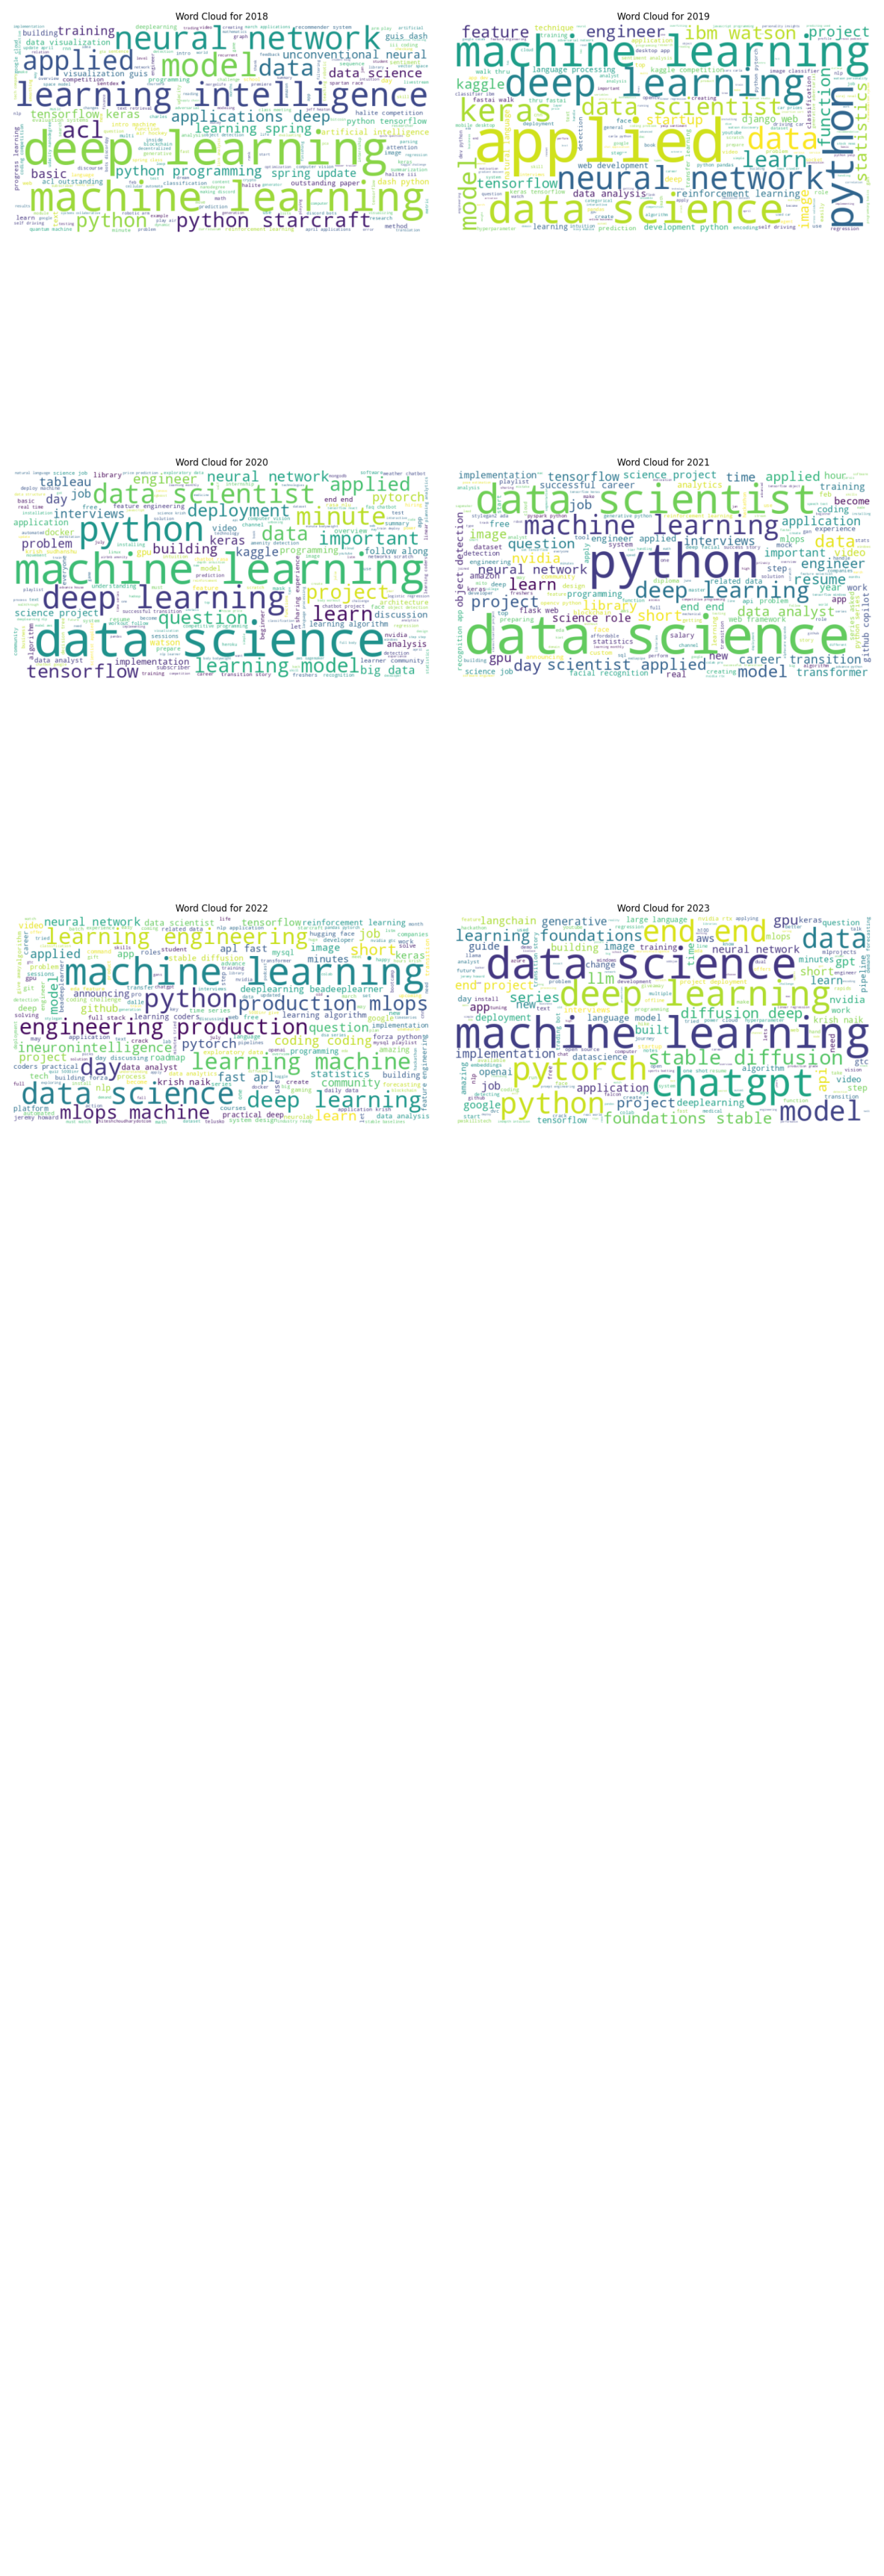

In [50]:
import matplotlib.pyplot as plt

# Define the paths to your PNG image files
image_paths = ["/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2018.png", "/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2019.png", "/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2020.png", 
               "/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2021.png","/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2022.png","/home/asmaa/youtube_analytics/Youtube Channels Analysis/artifacts/wordCloud2023.png"]

subplot_size = (6, 6)
n_images = 6
# Create a 2x2 grid of subplots
n_rows = len(image_paths)
n_cols = int(n_images**0.5)

if n_rows * n_cols < n_images:
    n_cols += 1
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * subplot_size[0], n_rows * subplot_size[1]))

# Display PNG images on subplots
for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        image = plt.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off unused subplots

# Customize appearance and save the figure as a PNG file
plt.tight_layout()
plt.savefig('grid_of_images.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

# Display the grid (optional)
plt.show()

### Topic Modelling

In [27]:
from bertopic import BERTopic

In [26]:
df.head()

Channel                                              Title  \
0  Jeff Heaton         lstm-based time series with pytorch (10.2)   
1  Jeff Heaton  time series data encoding for deep learning, p...   
2  Jeff Heaton  bayesian hyperparameter optimization for pytor...   
3  Jeff Heaton  creating certificates to deploy pyinstaller py...   
4  Jeff Heaton  how should you architect your pytorch neural n...   

  PublishedDate  Views  Likes  Comments  \
0    2023-10-27    764     45         1   
1    2023-10-26    530     31         1   
2    2023-10-25    453     29         1   
3    2023-10-17    439     12         0   
4    2023-10-12    825     39         1   

                                          text_token  \
0               [lstm, time, series, pytorch, 10, 2]   
1  [time, series, data, encoding, deep, learning,...   
2  [bayesian, hyperparameter, optimization, pytor...   
3  [creating, certificates, deploy, pyinstaller, ...   
4  [architect, pytorch, neural, network, hyperpar...   

                                         text_string  \
0                           lstm time series pytorch   
1    time series data encoding deep learning pytorch   
2       bayesian hyperparameter optimization pytorch   
3  creating certificates deploy pyinstaller pyqt ...   
4   architect pytorch neural network hyperparameters   

                                  text_string_fdist  \
0                          lstm time series pytorch   
1   time series data encoding deep learning pytorch   
2               hyperparameter optimization pytorch   
3               creating deploy app apple app store   
4  architect pytorch neural network hyperparameters   

                                    text_string_lem  is_equal  Year_published  
0                          lstm time series pytorch      True            2023  
1   time series data encoding deep learning pytorch      True            2023  
2               hyperparameter optimization pytorch      True            2023  
3               creating deploy app apple app store      True            2023  
4  architect pytorch neural network hyperparameters      True            2023

In [28]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [29]:
text = df['text_string']
topics, probs = topic_model.fit_transform(text)

In [30]:
topic_model.get_topic_info()

Topic  Count                                      Name  \
0       -1    941                 -1_shorts_keras_deep_step   
1        0    135  0_regression_intuition_decision_logistic   
2        1    122       1_engineer_machine_monthly_learning   
3        2     95    2_python_programming_functions_advance   
4        3     90                      3_nvidia_gpu_rtx_gtc   
..     ...    ...                                       ...   
106    105     11     105_healthcare_medicine_pie_prognosis   
107    106     11                106_colab_pro_google_worth   
108    107     11          107_hugging_face_bhai_mitigating   
109    108     11            108_trailer_move_teaser_royale   
110    109     10      109_intro_coded_hardest_unsupervised   

                                        Representation  \
0    [shorts, keras, deep, step, openai, data, care...   
1    [regression, intuition, decision, logistic, li...   
2    [engineer, machine, monthly, learning, project...   
3    [python, programming, functions, advance, list...   
4    [nvidia, gpu, rtx, gtc, geforce, rapids, works...   
..                                                 ...   
106  [healthcare, medicine, pie, prognosis, possibi...   
107  [colab, pro, google, worth, apple, speed, run,...   
108  [hugging, face, bhai, mitigating, tokenizers, ...   
109  [trailer, move, teaser, royale, humans, enterp...   
110  [intro, coded, hardest, unsupervised, ever, ma...   

                                   Representative_Docs  
0    [image processing python keras neural networks...  
1    [prep day learn machine learning algorithms in...  
2    [day machine learning engineer learning intell...  
3    [advance python series multiple inheritance py...  
4    [nvidia rtx a6000 look data science 48gb amper...  
..                                                 ...  
106  [healthcare reflections, healthcare startup, h...  
107  [google colab pro worth, google colab pro cola...  
108  [demo models learn nlp hugging face machine le...  
109  [school teaser trailer, move teaser trailer, m...  
110  [intro machine learning, intro machine learnin...  

[111 rows x 5 columns]

Most popular topic focuses on Machine Learning algorithms (linear & non linear)

In [31]:
topic_model.get_topic(topic=0)

[('regression', 0.052066441980375036),
 ('intuition', 0.04368426587901178),
 ('decision', 0.04310972882749387),
 ('logistic', 0.037531953313318794),
 ('linear', 0.034815351188069714),
 ('tree', 0.0338719297930309),
 ('algorithms', 0.029883824398791444),
 ('clustering', 0.02904118893351134),
 ('metrics', 0.028374749403876697),
 ('performance', 0.02709750013631179)]

Second most popular topic seems to be centered arounf addressing the learning topics of a ML engineer, working on projects and portfolio building. The assumption here is that these videos provide a practical guide to land a job in the field

In [32]:
topic_model.get_topic(topic=1)

[('engineer', 0.06729160969057275),
 ('machine', 0.04479650004064033),
 ('monthly', 0.0330109383486304),
 ('learning', 0.027279835388484924),
 ('projects', 0.02302521764802044),
 ('applied', 0.019929940884061418),
 ('portfolio', 0.018346950439989015),
 ('book', 0.017785445981256122),
 ('books', 0.016749051324194637),
 ('datasets', 0.016749051324194637)]

Third most popular topic focuses on Python programming

In [33]:
topic_model.get_topic(topic=2)

[('python', 0.07459285742178033),
 ('programming', 0.04935748522729736),
 ('functions', 0.048239006834447935),
 ('advance', 0.03555401689583696),
 ('list', 0.034379748040214826),
 ('iterators', 0.033124981704912786),
 ('dictionaries', 0.033124981704912786),
 ('methods', 0.030346417205518256),
 ('series', 0.02997376742692569),
 ('variables', 0.029823987990830067)]

Forth most popular topic dives into the hardware side

In [34]:
topic_model.get_topic(topic=3)

[('nvidia', 0.11068940669760369),
 ('gpu', 0.08333403077776863),
 ('rtx', 0.07669580016992424),
 ('gtc', 0.06097930428927608),
 ('geforce', 0.03910761331844012),
 ('rapids', 0.03787100167880313),
 ('workstation', 0.036757451209251425),
 ('dual', 0.03543434153838093),
 ('conference', 0.032934465265947316),
 ('3060', 0.03155860360701398)]

Fifth most popular topic is about networks and deep learning frameworks

In [35]:
topic_model.get_topic(topic=4)

[('tensorflow', 0.10368453610835741),
 ('keras', 0.07808719243515308),
 ('convolutional', 0.040440663427227026),
 ('convolution', 0.03892046947948849),
 ('augmentation', 0.037499979288580516),
 ('neural', 0.0362201484737035),
 ('deep', 0.032668885068216816),
 ('cnn', 0.02826162522220746),
 ('networks', 0.025990712313738888),
 ('network', 0.02569223679844699)]

In [36]:
topic_model.visualize_topics()

In [37]:
topic_model.visualize_barchart()

In [39]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

fd.most_common(20)

[('data', 966),
 ('learning', 956),
 ('science', 532),
 ('machine', 511),
 ('python', 497),
 ('deep', 371),
 ('applied', 190),
 ('neural', 168),
 ('scientist', 165),
 ('tensorflow', 135),
 ('keras', 120),
 ('model', 113),
 ('end', 110),
 ('learn', 108),
 ('programming', 100),
 ('project', 96),
 ('day', 90),
 ('engineering', 89),
 ('networks', 87),
 ('2020', 80)]

In [40]:
fd.tabulate(20)

       data    learning     science     machine      python        deep     applied      neural   scientist  tensorflow       keras       model         end       learn programming     project         day engineering    networks        2020 
        966         956         532         511         497         371         190         168         165         135         120         113         110         108         100          96          90          89          87          80 


In [41]:
# Obtain top 10 words
top_20 = fd.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

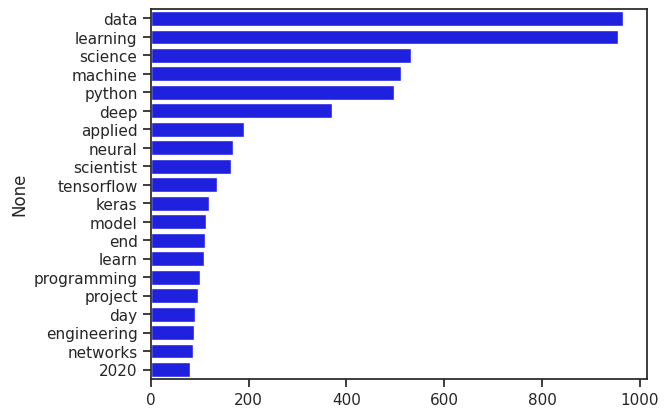

In [42]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [43]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()